# MINERÍA DE TEXTOS

## Alumna: Jessica Sarahi Méndez Rincón


###  Proyecto Analisis de Sentimientos y Polaridad en Tweets con algoritmos de análisis en letras musicales

## Contexto:
    
    El año 2020 se vio afectado por el impacto a la sociedad mundial sobre una gripe de alto nivel de contagio así como la causa principal de fallecimientos alrededor del Mundo.
    
    México no ha sido exento del raro virus.
    
    Con el presente Proyecto, el objetivo primordial es desarrollar los algoritmos que ayuden a monitorizar el efecto en los comentarios que en la Red Social de Twitter se emiten, y que ayudé a dar una idea del estado de ánimo de la gente.

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQUpnfdhCKN1C3OIbNrDdyjctlRsA9t6386WWD8JkUzt_X7JiuH&usqp=CAU" alt="Alt text that describes the graphic" title="Title text" />

In [18]:
# Importacion de librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#Tienes que descargarte las stopwords primero via nltk.download()
import nltk
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.corpus import wordnet as wn
from nltk import word_tokenize
from nltk.data import load
from nltk.stem import SnowballStemmer 
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from string import punctuation
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict 
from sklearn import model_selection, naive_bayes, svm
import seaborn as sns
import matplotlib.pyplot as pl


In [2]:
non_words = list(punctuation)
non_words.extend(['¿', '¡'])
non_words.extend(map(str,range(10)))


## Preparar los datos


In [3]:
# Importacion del archivo que se nos proporciono agregandole cabeceras que no contiene
names = ['Id', 'tweet', 'polaridad']
dataset = pd.read_csv('train.txt', sep='\t',names=names)

In [4]:
dataset.head()

,Id,tweet,polaridad
0,818942405281980417,No mames este pinche dolor que pedo? ya mejor ...,N
1,818963123646373892,"@leomall2018 Según yo era como aviso, pero aho...",NEU
2,818998133694697472,@benshorts a juzgar por mis comportamientos au...,N
3,818822556090105857,#BuenosDias mundo Twittero ya desperté y estoy...,P
4,818993011514372098,No pude resolver el rompecabezas en Los rios d...,N


# Análisis de Sentimientos

In [5]:
#pip install bidict
#pip install py_lex
#conda install -c conda-forge python-marisa-trie

In [6]:
from py_lex import EmoLex

In [7]:
lexicon = EmoLex('lexicon_spanish.txt')

In [8]:
#tweet3
# Importacion del archivo que se nos proporciono agregandole cabeceras que no contiene
names = ['Id', 'tweet', 'polaridad']
dataset2 = pd.read_csv('train.txt', sep='\t',names=names)
dataset2.head()

,Id,tweet,polaridad
0,818942405281980417,No mames este pinche dolor que pedo? ya mejor ...,N
1,818963123646373892,"@leomall2018 Según yo era como aviso, pero aho...",NEU
2,818998133694697472,@benshorts a juzgar por mis comportamientos au...,N
3,818822556090105857,#BuenosDias mundo Twittero ya desperté y estoy...,P
4,818993011514372098,No pude resolver el rompecabezas en Los rios d...,N


In [9]:
lemmatizer = WordNetLemmatizer() 
dataset2['tweetF']=[lemmatizer.lemmatize(w,'v') for w in dataset2.tweet] 
dataset2.head()


,Id,tweet,polaridad,tweetF
0,818942405281980417,No mames este pinche dolor que pedo? ya mejor ...,N,No mames este pinche dolor que pedo? ya mejor ...
1,818963123646373892,"@leomall2018 Según yo era como aviso, pero aho...",NEU,"@leomall2018 Según yo era como aviso, pero aho..."
2,818998133694697472,@benshorts a juzgar por mis comportamientos au...,N,@benshorts a juzgar por mis comportamientos au...
3,818822556090105857,#BuenosDias mundo Twittero ya desperté y estoy...,P,#BuenosDias mundo Twittero ya desperté y estoy...
4,818993011514372098,No pude resolver el rompecabezas en Los rios d...,N,No pude resolver el rompecabezas en Los rios d...


In [10]:
dataset2.head(5)

,Id,tweet,polaridad,tweetF
0,818942405281980417,No mames este pinche dolor que pedo? ya mejor ...,N,No mames este pinche dolor que pedo? ya mejor ...
1,818963123646373892,"@leomall2018 Según yo era como aviso, pero aho...",NEU,"@leomall2018 Según yo era como aviso, pero aho..."
2,818998133694697472,@benshorts a juzgar por mis comportamientos au...,N,@benshorts a juzgar por mis comportamientos au...
3,818822556090105857,#BuenosDias mundo Twittero ya desperté y estoy...,P,#BuenosDias mundo Twittero ya desperté y estoy...
4,818993011514372098,No pude resolver el rompecabezas en Los rios d...,N,No pude resolver el rompecabezas en Los rios d...


In [11]:
dataset2['tweetF'] = dataset2.tweetF.str.strip().str.split('[\W_]+')

In [12]:
rows = list()
for row in dataset2[['tweetF']].iterrows():
    r = row[1]
    for word in r.tweetF:
        rows.append((word))

tweet3 = pd.DataFrame(rows, columns=['tweet'])
tweet3.head()

,tweet
0,No
1,mames
2,este
3,pinche
4,dolor


In [13]:

summary = lexicon.summarize_doc(tweet3)
summary

{'trust': 0.0,
 'fear': 0.0,
 'surprise': 0.0,
 'joy': 0.0,
 'disgust': 0.0,
 'negative': 0.0,
 'anger': 0.0,
 'sadness': 0.0,
 'positive': 0.0,
 'anticipation': 0.0}

In [14]:

dataset2['anger'] = 0.0
dataset2['anticipation'] = 0.0
dataset2['disgust'] = 0.0
dataset2['fear'] = 0.0
dataset2['joy'] = 0.0
dataset2['negative'] = 0.0
dataset2['positive'] = 0.0
dataset2['sadness'] = 0.0
dataset2['surprise'] = 0.0
dataset2['trust'] = 0.0

In [15]:
dataset2.head(5)

,Id,tweet,polaridad,tweetF,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
0,818942405281980417,No mames este pinche dolor que pedo? ya mejor ...,N,"[No, mames, este, pinche, dolor, que, pedo, ya...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,818963123646373892,"@leomall2018 Según yo era como aviso, pero aho...",NEU,"[, leomall2018, Según, yo, era, como, aviso, p...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,818998133694697472,@benshorts a juzgar por mis comportamientos au...,N,"[, benshorts, a, juzgar, por, mis, comportamie...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,818822556090105857,#BuenosDias mundo Twittero ya desperté y estoy...,P,"[, BuenosDias, mundo, Twittero, ya, desperté, ...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,818993011514372098,No pude resolver el rompecabezas en Los rios d...,N,"[No, pude, resolver, el, rompecabezas, en, Los...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:

for index, _ in dataset2.iterrows():
    try:
        to_lower = list(map(lambda x:x.lower(),dataset2.loc[index].tweetF))
        summary = lexicon.summarize_doc(to_lower)
        for key in summary.keys():
            dataset2.at[index, key] = summary[key]
            #print(dataset2.at[index, key] )
    except:
        continue

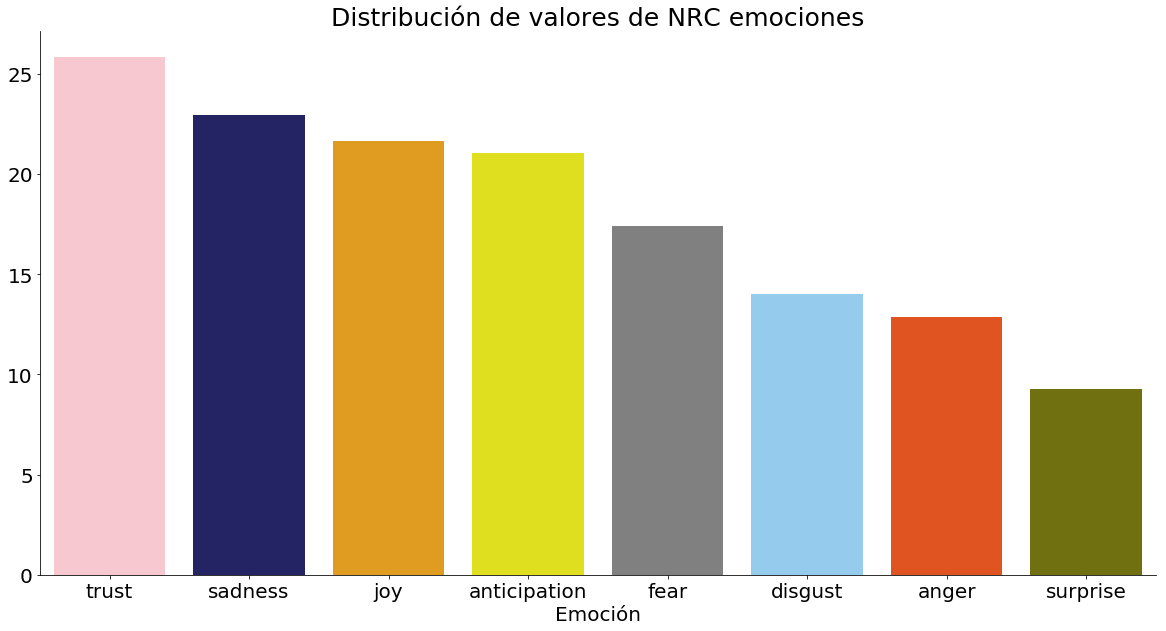

In [21]:
total_sentiments = pd.DataFrame(dataset2.sum()[['fear', 'sadness', 'surprise', 'trust', 'joy', 'anticipation', 'anger', 'disgust']].sort_values(ascending=False))
colors = ['pink', 'midnightblue', 'orange', 'yellow', 'grey', 'lightskyblue', 'orangered',  'olive']
total_sentiments.columns = ['value']

fig, ax = plt.subplots(figsize=(20,10))
ax = sns.barplot(x=total_sentiments.index, y='value', data=total_sentiments, palette=sns.color_palette(colors))
plt.ylabel("")
plt.xlabel('Emoción', fontsize=20)
plt.title('Distribución de valores de NRC emociones', fontsize=25)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(20) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(20)
sns.despine()
plt.savefig('img/nrc_emotions.jpg')
plt.plot();

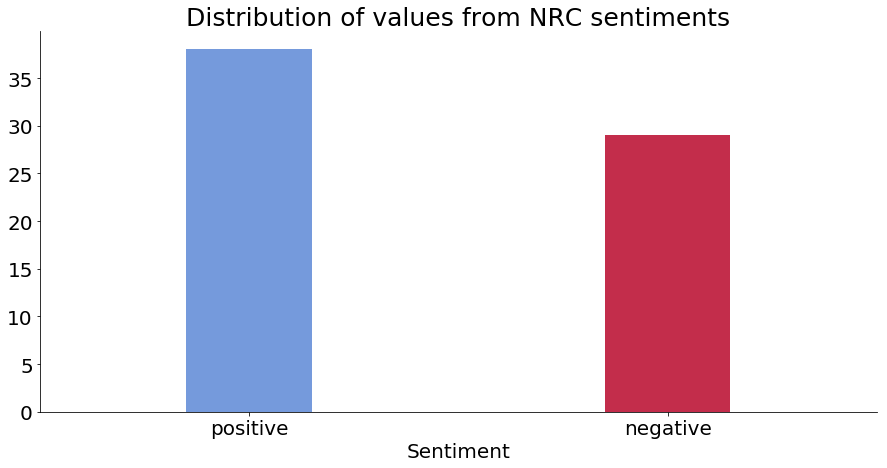

In [23]:

total_sentiment = pd.DataFrame(dataset2.sum()[['positive', 'negative']])
total_sentiment.columns = ['value']

fig, ax = plt.subplots(figsize=(15,7))
ax = sns.barplot(x=total_sentiment.index, y='value', data=total_sentiment, palette=sns.color_palette(['cornflowerblue', 'crimson']))
plt.ylabel("")
plt.xlabel('Sentiment', fontsize=20)
plt.title('Distribution of values from NRC sentiments', fontsize=25)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(20) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(20)
for patch in ax.patches :
    current_width = patch.get_width()
    diff = current_width - .3

    # we change the bar width
    patch.set_width(.3)

    # we recenter the bar
    patch.set_x(patch.get_x() + diff * .5)
sns.despine()
plt.savefig('img/nrc_sentiments.jpg')
plt.plot();